In [ ]:
pip install tensorflow


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt

In [ ]:
print("[INFO] accessing MNIST...")
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape((x_train.shape[0], -1)).astype('float32') / 255
x_test = x_test.reshape((x_test.shape[0], -1)).astype('float32') / 255

[INFO] accessing MNIST...
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

one-hot encoding representations for each digit, 0−9, in the listing below:
0: [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
1: [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
2: [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
3: [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
4: [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
5: [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
6: [0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
7: [0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
8: [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
9: [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

In [ ]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
H = model.fit(x_train, y_train, epochs=15, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.6281 - loss: 1.2816 - val_accuracy: 0.9114 - val_loss: 0.3141
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9095 - loss: 0.3087 - val_accuracy: 0.9297 - val_loss: 0.2433
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9318 - loss: 0.2386 - val_accuracy: 0.9407 - val_loss: 0.1983
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9421 - loss: 0.1961 - val_accuracy: 0.9483 - val_loss: 0.1727
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9505 - loss: 0.1741 - val_accuracy: 0.9537 - val_loss: 0.1565
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9575 - loss: 0.1456 - val_accuracy: 0.9546 - val_loss: 0.1463
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9598 - loss: 0.1357 - val_accuracy: 0.9605 - val_loss: 0.1311
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9650 - loss: 0.1200 - 

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy*100:.2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9655 - loss: 0.1113
Test accuracy: 97.11%


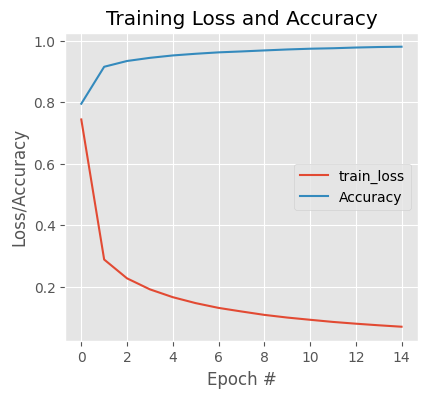

In [ ]:
plt.style.use("ggplot")
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(H.history['loss'], label="train_loss")
plt.plot(H.history['accuracy'], label="Accuracy")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()